In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
columns=boston.feature_names

In [4]:
bos.columns=columns

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
"""Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
"""

"Boston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pu

In [7]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [8]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
import matplotlib.pyplot as sns
import seaborn as sns
len(bos.columns)

13

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


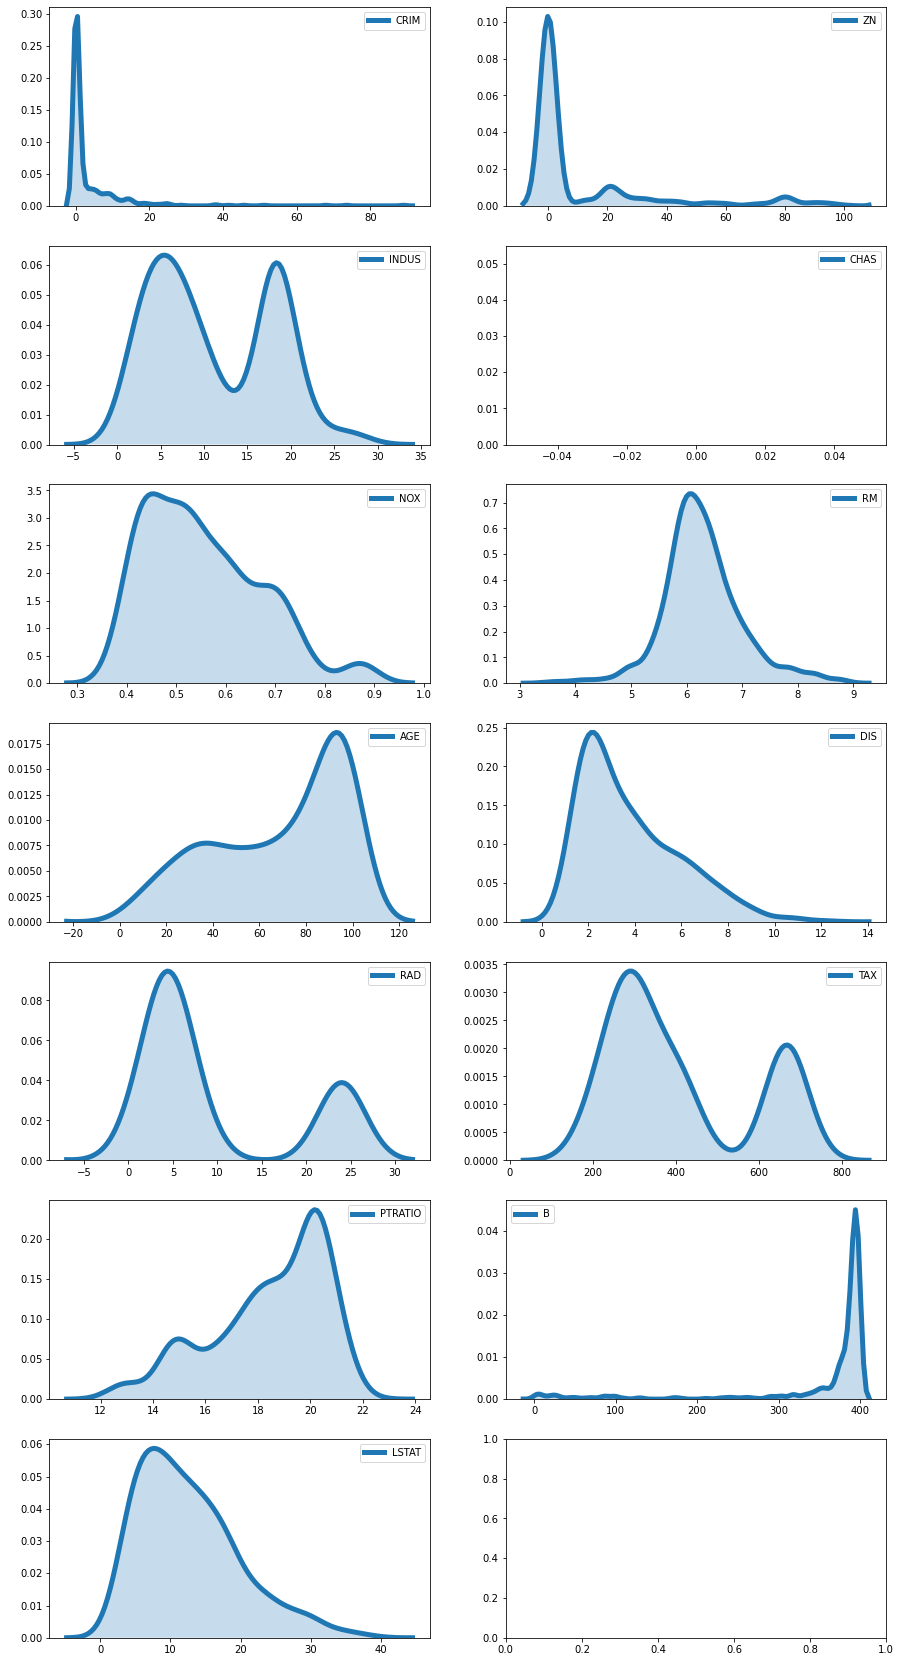

In [11]:

fig,ax=plt.subplots(7,2,figsize=(15,30),squeeze=False)
i,j=0,0
for col in bos.columns:
    sns.kdeplot(data=bos[col],ax=ax[i,j],shade=True,linewidth=5)
    j+=1
    if j==2 :
        i+=1
        j=0

0.0    471
1.0     35
Name: CHAS, dtype: int64

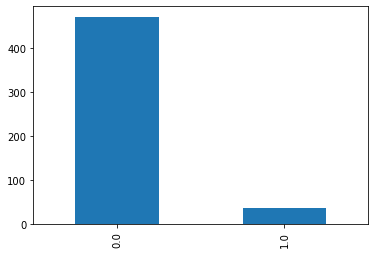

In [12]:
bos.CHAS.value_counts().plot(kind='bar')
bos.CHAS.value_counts()

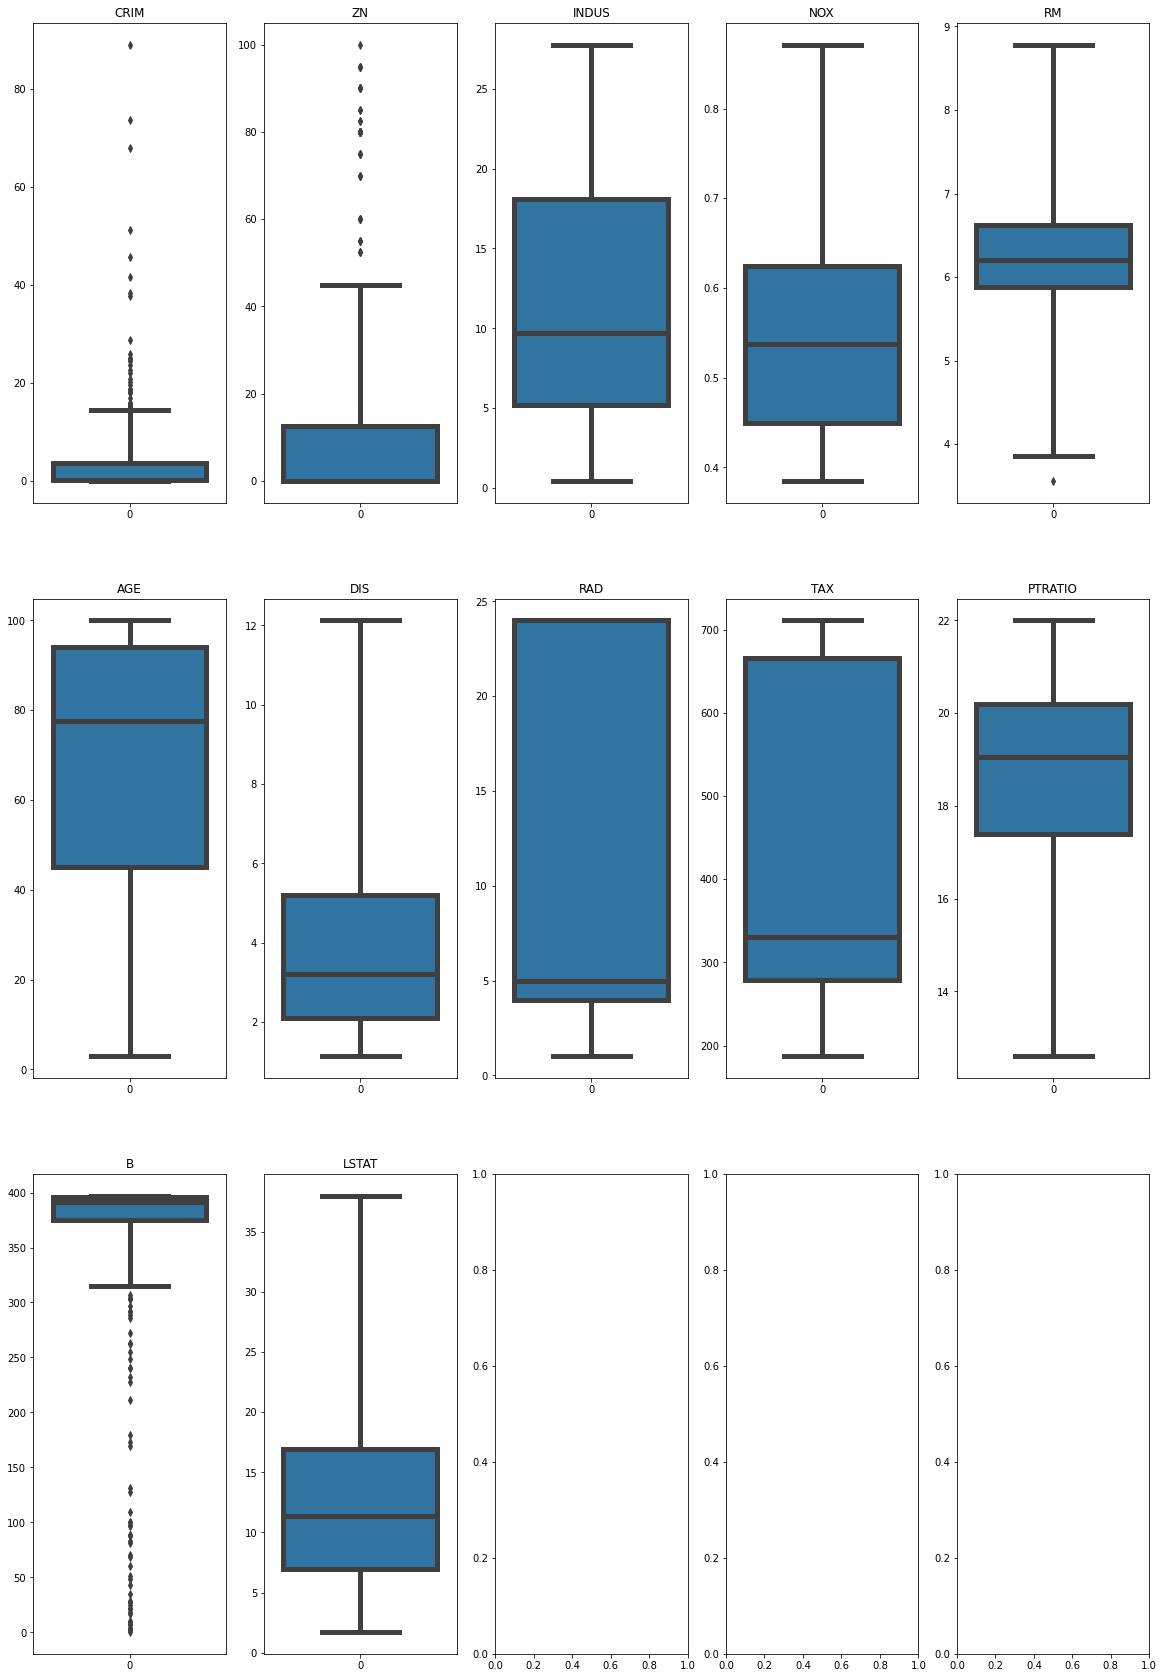

In [13]:
fig,ax=plt.subplots(3,5,figsize=(20,30),squeeze=False)
i,j=0,0
for col in bos.columns:
    if col in ['Price',"CHAS"] :
        continue
    sns.boxplot(data=bos[col],ax=ax[i,j],whis=3,linewidth=5)
    ax[i,j].set_title(col)
    j+=1
    if j==5 :
        i+=1
        j=0

In [14]:

for i in bos.columns :
    if i=='CHAS':
        continue
    print("\n",i)
    b=0
    Q1=bos[i].quantile(0.25)
    Q3=bos[i].quantile(0.75)
    IQR=Q3-Q1
    print(Q1,Q3,IQR)
    for idx,j in enumerate(bos[i]):
        if j>Q3+3*IQR or j<Q1-3*IQR:
            b+=1
            bos.loc[idx,i]=bos[i].mean()
    print(f"No. of outliers :{b}")      


 CRIM
0.08204499999999999 3.6770825 3.5950375
No. of outliers :30

 ZN
0.0 12.5 12.5
No. of outliers :45

 INDUS
5.19 18.1 12.91
No. of outliers :0

 NOX
0.449 0.624 0.175
No. of outliers :0

 RM
5.8855 6.6235 0.7379999999999995
No. of outliers :1

 AGE
45.025 94.07499999999999 49.04999999999999
No. of outliers :0

 DIS
2.100175 5.1884250000000005 3.0882500000000004
No. of outliers :0

 RAD
4.0 24.0 20.0
No. of outliers :0

 TAX
279.0 666.0 387.0
No. of outliers :0

 PTRATIO
17.4 20.2 2.8000000000000007
No. of outliers :0

 B
375.3775 396.225 20.847500000000025
No. of outliers :58

 LSTAT
6.949999999999999 16.955000000000002 10.005000000000003
No. of outliers :0


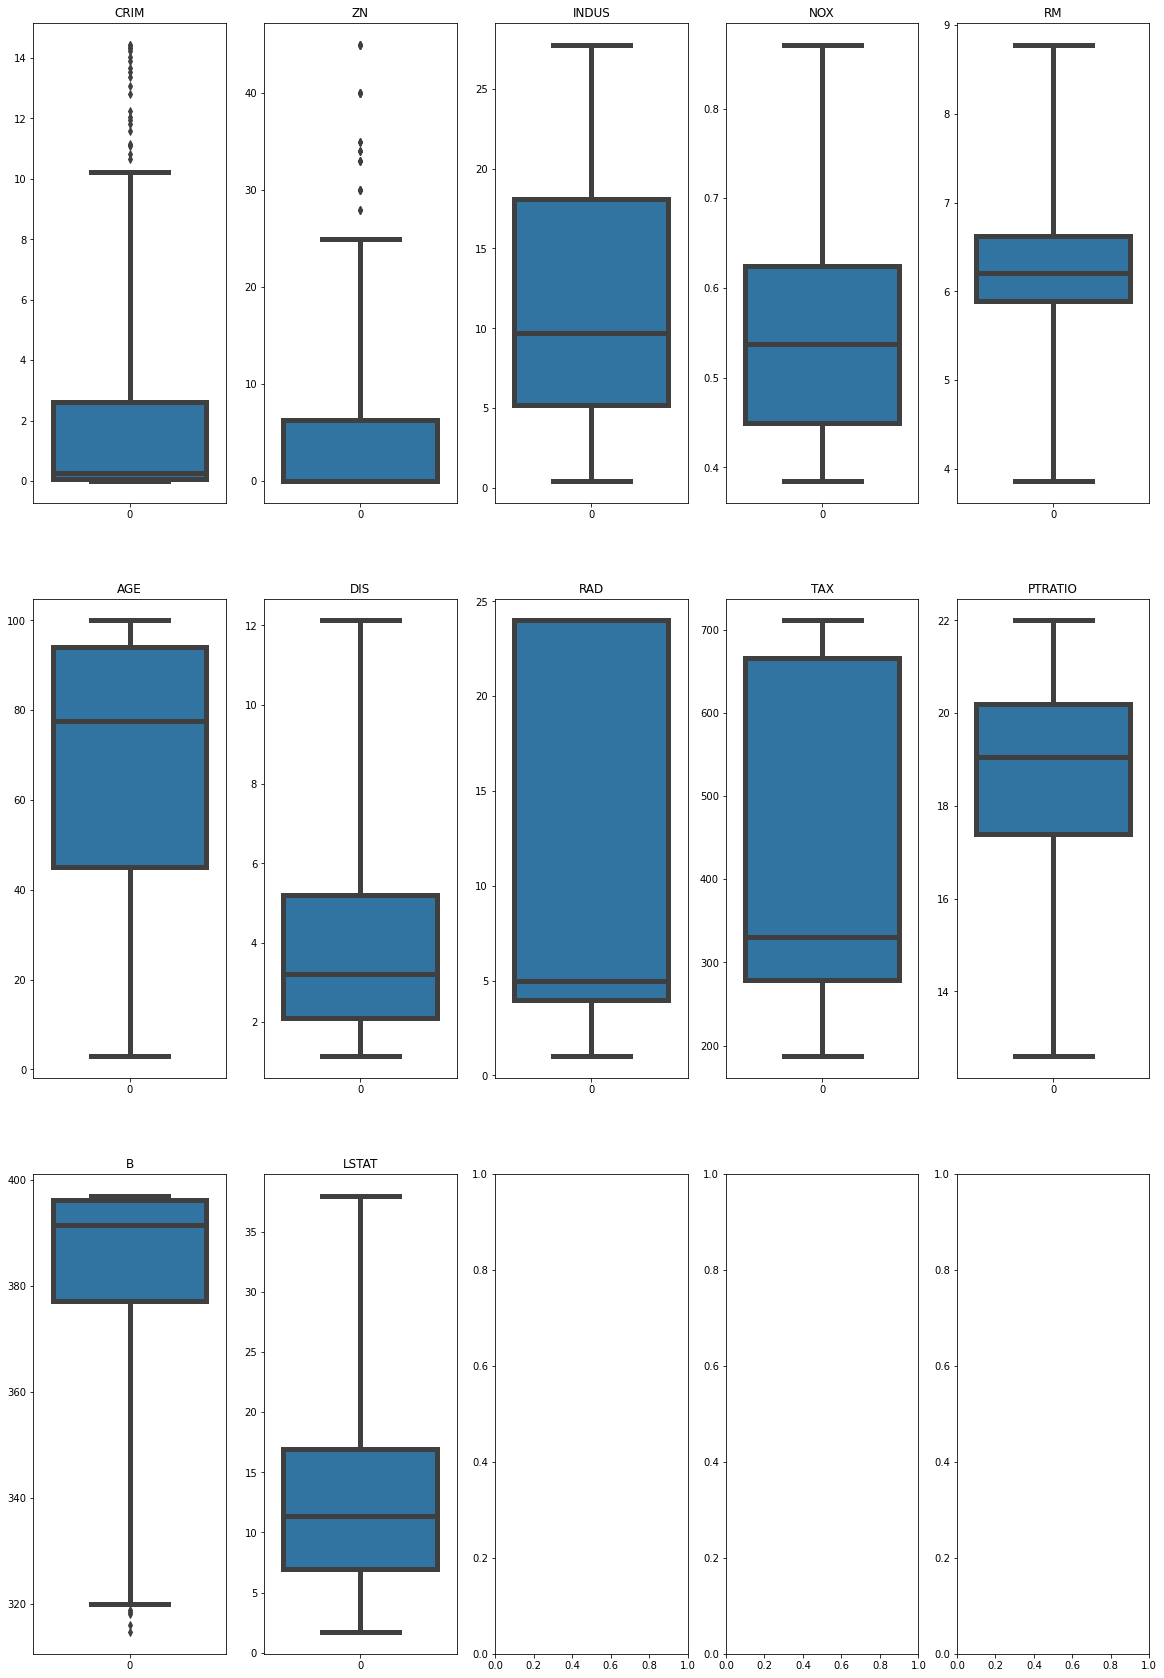

In [15]:
fig,ax=plt.subplots(3,5,figsize=(20,30),squeeze=False)
i,j=0,0
for col in bos.columns:
    if col in ['Price',"CHAS"] :
        continue
    sns.boxplot(data=bos[col],ax=ax[i,j],whis=3,linewidth=5)
    ax[i,j].set_title(col)
    j+=1
    if j==5 :
        i+=1
        j=0

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
bos_standardized=np.power(bos,0.5)
bos_standardized=pd.DataFrame(scaler.fit_transform(bos_standardized),columns=bos.columns)


In [17]:
bos_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.942283,1.559133,-1.503533,-0.272599,-0.097656,0.437455,0.015300,0.278822,-1.396857,-0.644166,-1.453573,0.757474,-1.202689
1,-0.856299,-0.568385,-0.456133,-0.272599,-0.738448,0.216961,0.426550,0.679364,-1.076581,-1.053383,-0.266921,0.757474,-0.399953
2,-0.856360,-0.568385,-0.456133,-0.272599,-0.738448,1.286441,-0.116031,0.679364,-1.076581,-1.053383,-0.266921,0.519738,-1.429933
3,-0.841602,-0.568385,-1.543428,-0.272599,-0.844859,1.030146,-0.650040,1.132573,-0.830825,-1.216415,0.139631,0.625030,-1.726876
4,-0.758527,-0.568385,-1.543428,-0.272599,-0.844859,1.234633,-0.347426,1.132573,-0.830825,-1.216415,0.139631,0.757474,-1.124522


In [18]:
bos['Price']=boston.target
bos_standardized['Price']=boston.target
bos_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.942283,1.559133,-1.503533,-0.272599,-0.097656,0.437455,0.015300,0.278822,-1.396857,-0.644166,-1.453573,0.757474,-1.202689,24.0
1,-0.856299,-0.568385,-0.456133,-0.272599,-0.738448,0.216961,0.426550,0.679364,-1.076581,-1.053383,-0.266921,0.757474,-0.399953,21.6
2,-0.856360,-0.568385,-0.456133,-0.272599,-0.738448,1.286441,-0.116031,0.679364,-1.076581,-1.053383,-0.266921,0.519738,-1.429933,34.7
3,-0.841602,-0.568385,-1.543428,-0.272599,-0.844859,1.030146,-0.650040,1.132573,-0.830825,-1.216415,0.139631,0.625030,-1.726876,33.4
4,-0.758527,-0.568385,-1.543428,-0.272599,-0.844859,1.234633,-0.347426,1.132573,-0.830825,-1.216415,0.139631,0.757474,-1.124522,36.2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


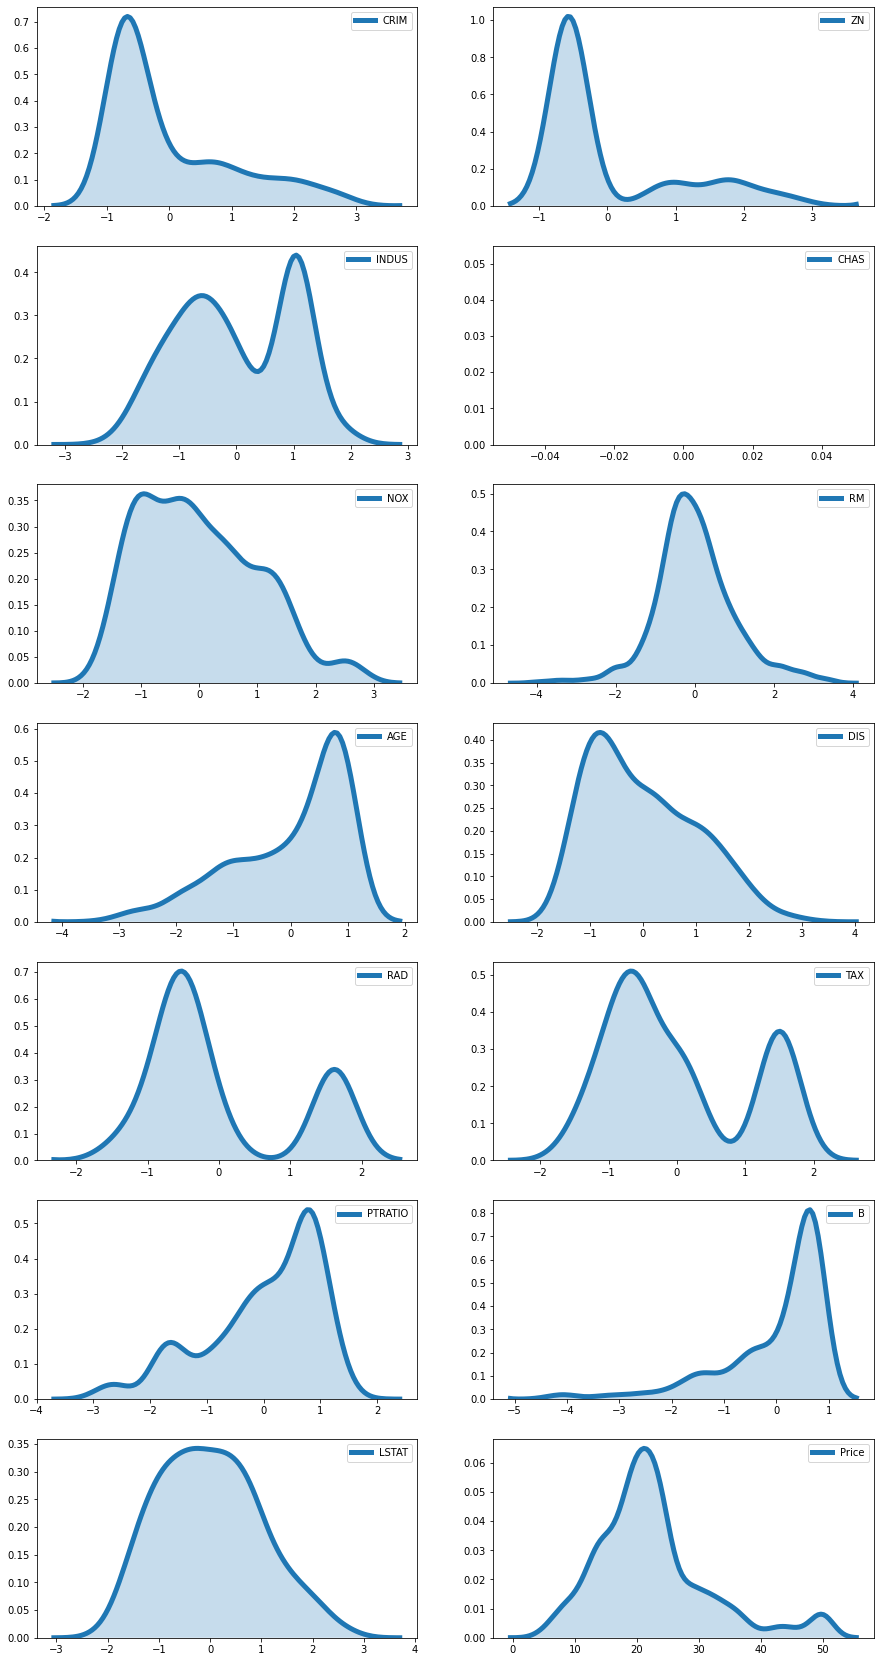

In [19]:

fig,ax=plt.subplots(7,2,figsize=(15,30),squeeze=False)
i,j=0,0
for col in bos_standardized.columns:
    sns.kdeplot(data=bos_standardized[col],ax=ax[i,j],shade=True,linewidth=5)
    j+=1
    if j==2 :
        i+=1
        j=0